In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import StandardScaler

In [2]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [3]:
oscars_df.describe()

,Unnamed: 0,runtime (mins),metacritic score,budget,Total_Noms,Director_Avg_Score,Total_Director_Movies,Lead_Actor_Avg_Score,Total_Movies_Lead_Actor,Avg_Rating_by_Genre,...,R,Unrated,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Quentin Tarantino,Writer_Woody Allen
count,1136.000000,1136.000000,1136.000000,1.072000e+03,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,...,1136.000000,1136.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,567.500000,120.032570,72.083627,4.268831e+07,2.930458,72.083627,3.609155,72.083627,3.540493,72.083627,...,0.470070,0.013204,0.109091,0.163636,0.090909,0.127273,0.090909,0.090909,0.109091,0.218182
std,328.079259,21.817864,13.554168,5.070841e+07,2.699895,11.433456,3.706699,10.825048,3.630286,5.392965,...,0.499323,0.114199,0.314627,0.373355,0.290129,0.336350,0.290129,0.290129,0.314627,0.416818
min,0.000000,70.000000,16.000000,6.500000e+04,1.000000,16.000000,1.000000,28.000000,1.000000,38.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,283.750000,105.000000,64.000000,1.136429e+07,1.000000,66.000000,1.000000,66.000000,1.000000,70.241379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,567.500000,118.000000,74.000000,2.500000e+07,2.000000,73.500000,2.000000,73.000000,2.000000,73.604651,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,851.250000,132.000000,82.000000,5.200000e+07,4.000000,79.500000,4.000000,79.000000,4.000000,75.185185,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1135.000000,224.000000,100.000000,3.210000e+08,16.000000,100.000000,20.000000,100.000000,19.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
oscars_df.drop(columns = ['Unnamed: 0'],inplace=True)

In [5]:
oscars_df.shape

(1136, 105)

In [6]:
oscars_df.head()

,IMDBId,movie title,language,country,runtime (mins),mpaarating,metacritic score,budget,distributionCompany,Awards,...,R,Unrated,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Quentin Tarantino,Writer_Woody Allen
0,tt0091763,Platoon,English,USA,120,R,92.0,6.000000e+06,Orion Pictures,Best Actor in a Supporting Role,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0082979,Reds,English,USA,195,PG,76.0,3.200000e+07,Paramount Pictures,Best Actor in a Leading Role,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0084434,An Officer and a Gentleman,English,USA,124,R,75.0,7.500000e+06,Paramount Pictures,Best Actor in a Supporting Role,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0119360,In & Out,English,USA,90,PG-13,70.0,3.500000e+07,Paramount Pictures,Best Actress in a Supporting Role,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0292542,Son of the Bride,Spanish,Argentina,123,R,68.0,1.136429e+07,Sony Pictures Classics,Best Foreign Language Film,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)
oscars_data = oscars_df[numerical_vars]
oscars_data.shape

(1136, 87)

In [8]:
#oscars_data['budget'].fillna(oscars_data['budget'].mean(),inplace=True)

In [9]:
oscars_data.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
oscars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 87 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   runtime (mins)                                           1136 non-null   int64  
 1   metacritic score                                         1136 non-null   float64
 2   budget                                                   1136 non-null   float64
 3   Total_Noms                                               1136 non-null   int64  
 4   Director_Avg_Score                                       1136 non-null   float64
 5   Total_Director_Movies                                    1136 non-null   int64  
 6   Lead_Actor_Avg_Score                                     1136 non-null   float64
 7   Total_Movies_Lead_Actor                                  1136 non-null   int64  
 8   Avg_Rating_by_Genre         

In [11]:
smaller_df = oscars_df[['metacritic score','Director_Avg_Score','Lead_Actor_Avg_Score','Avg_Rating_by_Genre',
                        'Awards_Best Motion Picture of the Year','Winter','Total_Noms']]

In [12]:
smaller_df.corr()

,metacritic score,Director_Avg_Score,Lead_Actor_Avg_Score,Avg_Rating_by_Genre,Awards_Best Motion Picture of the Year,Winter,Total_Noms
metacritic score,1.000000,0.843538,0.798651,0.397882,0.308170,0.033733,0.327954
Director_Avg_Score,0.843538,1.000000,0.730323,0.371637,0.291882,0.045729,0.180483
Lead_Actor_Avg_Score,0.798651,0.730323,1.000000,0.370510,0.240532,0.032835,0.205334
Avg_Rating_by_Genre,0.397882,0.371637,0.370510,1.000000,0.029341,0.033595,0.027108
Awards_Best Motion Picture of the Year,0.308170,0.291882,0.240532,0.029341,1.000000,0.018928,0.462611
Winter,0.033733,0.045729,0.032835,0.033595,0.018928,1.000000,0.191955
Total_Noms,0.327954,0.180483,0.205334,0.027108,0.462611,0.191955,1.000000


In [13]:
selected_columns = ['Director_Avg_Score','Lead_Actor_Avg_Score','Avg_Rating_by_Genre',
                        'Awards_Best Motion Picture of the Year','Winter','Total_Noms']

In [21]:
X = smaller_df.drop(columns='metacritic score')
y = smaller_df['metacritic score']

In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [23]:
X_train.columns

Index(['Director_Avg_Score', 'Lead_Actor_Avg_Score', 'Avg_Rating_by_Genre',
       'Awards_Best Motion Picture of the Year', 'Winter', 'Total_Noms'],
      dtype='object')

In [29]:
X_train.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 184 to 763
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Director_Avg_Score                      681 non-null    float64
 1   Lead_Actor_Avg_Score                    681 non-null    float64
 2   Avg_Rating_by_Genre                     681 non-null    float64
 3   Awards_Best Motion Picture of the Year  681 non-null    float64
 4   Winter                                  681 non-null    int64  
 5   Total_Noms                              681 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 37.2 KB


In [31]:
X_val.shape

(227, 6)

In [32]:
lasso_model = LassoCV() 
lasso_model.fit(X_train, y_train)

LassoCV()

In [36]:
X_test.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [37]:
list(zip(smaller_df.drop(columns='metacritic score'), lasso_model.coef_))

[('Director_Avg_Score', 0.6309316121196695),
 ('Lead_Actor_Avg_Score', 0.4424379578601181),
 ('Avg_Rating_by_Genre', 0.1922410410942592),
 ('Awards_Best Motion Picture of the Year', -0.0),
 ('Winter', -0.354410222997788),
 ('Total_Noms', 0.7369840336742177)]

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     505.3
Date:                Tue, 06 Oct 2020   Prob (F-statistic):          1.33e-245
Time:                        21:37:29   Log-Likelihood:                -2173.6
No. Observations:                 681   AIC:                             4361.
Df Residuals:                     674   BIC:                             4393.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -21.9244      3.164     -6.929      0.000     -28.137     -15.712
Director_Avg_Score                         0.6335      0.029     21.637      0.000       0.576       0.691
Lead_Actor_Avg_Score                       0.4415      0.031     14.169      0.000       0.380       0.503
Avg_Rating_by_Genre                        0.2015      0.047      4.323      0.000       0.110       0.293
Awards_Best Motion Picture of the Year    -1.3400      0.870     -1.541      0.124      -3.048       0.368
Winter                                    -1.1310      0.472     -2.394      0.017      -2.059      -0.203
Total_Noms                                 0.8590      0.098      8.774      0.000       0.667       1.051
==============================================================================
Omnibus:                       27.284   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.098
Skew:                          -0.313   Prob(JB):                     2.66e-10
Kurtosis:                       4.078   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
test_set_pred = lasso_model.predict(X_test)

In [42]:
lasso_model.score(X_train,y_train)

0.8167530912695501

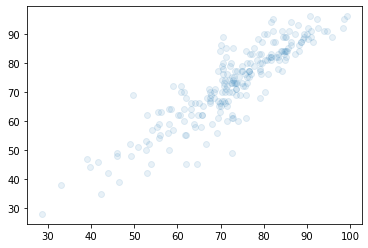

In [40]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(50,100,1), np.linspace(50,100,1))

In [43]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [44]:
X_tr = std.transform(X_train.values)

In [45]:
X_te = std.transform(X_test.values)

In [46]:
type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [47]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(cv=5)
lasso_model.fit(X_tr, y_train)
lasso_model.score(X_tr,y_train)

0.8181263313206335

In [48]:
lasso_model.alpha_

0.011752854129383728

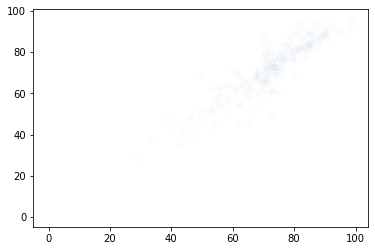

In [49]:
plt.scatter(test_set_pred, y_test, alpha=0.01)
plt.plot(np.linspace(0,100,1), np.linspace(0,100,1));